In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

energy_stats = pd.read_csv("data/energy_stats.csv")
energy_stats.head(n=10)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
5,Belgium,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",25.0,NaN,additives_and_oxygenates
6,Belgium,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",22.0,NaN,additives_and_oxygenates
7,Belgium,Additives and Oxygenates - Exports,2009,"Metric tons, thousand",45.0,NaN,additives_and_oxygenates
8,Czechia,Additives and Oxygenates - Exports,1998,"Metric tons, thousand",1.0,NaN,additives_and_oxygenates
9,Czechia,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",7.0,NaN,additives_and_oxygenates


In [69]:
energy_stats.describe()

,year,quantity,quantity_footnotes
count,1.189482e+06,1.189482e+06,163946.0
mean,2.002852e+03,1.842648e+05,1.0
std,7.167345e+00,1.585663e+07,0.0
min,1.990000e+03,-8.643480e+05,1.0
25%,1.997000e+03,1.400000e+01,1.0
50%,2.003000e+03,1.890000e+02,1.0
75%,2.009000e+03,2.265000e+03,1.0
max,2.014000e+03,6.680329e+09,1.0


In [79]:

energy_stats.tail(n=10)

# Did this whole exercise with all the countries at first, but the csv is too large to load.
# It's too large to even open locally.
# So deleting the countries not used and saving again
energy_stats = energy_stats.loc[energy_stats['country_or_area'].isin(['Canada', 'China', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States'])]
energy_stats = energy_stats.loc[energy_stats['category'].isin(['wind_electricity', 'solar_electricity'])]                                
energy_stats.to_csv("data/energy_stats.csv")                                

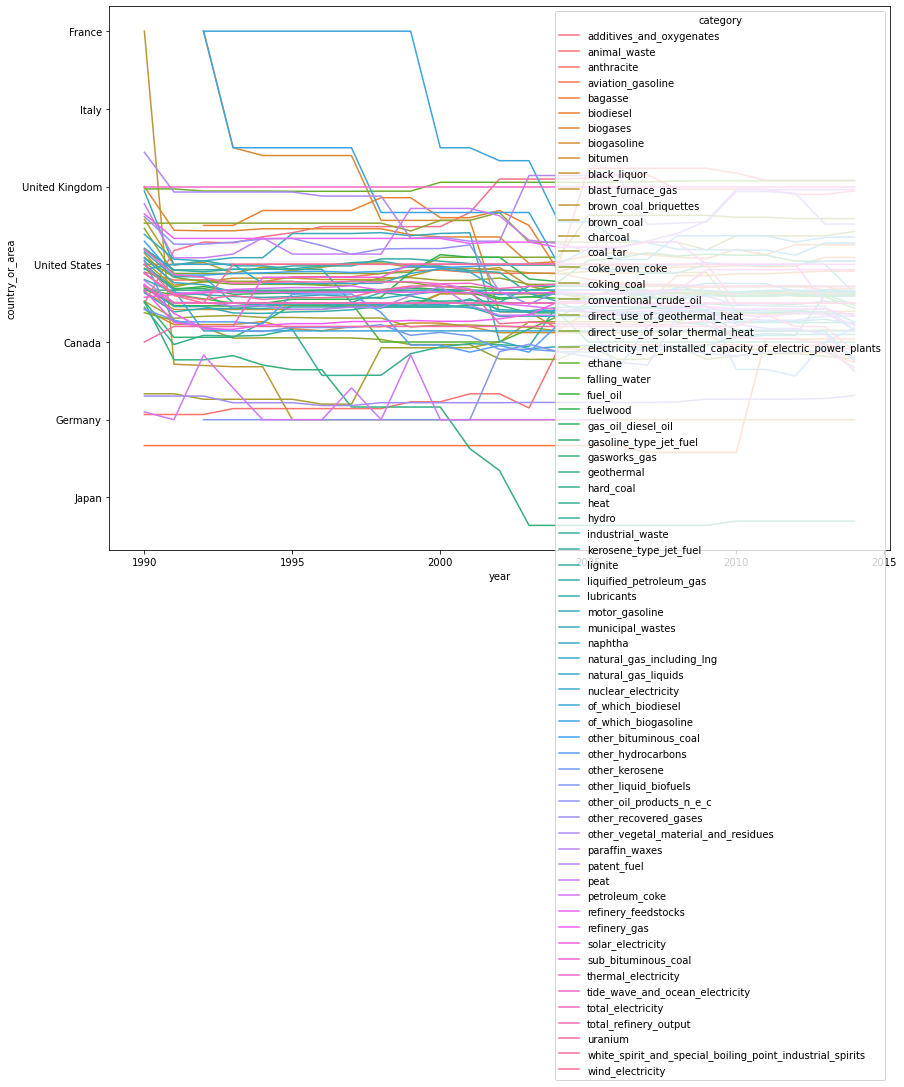

In [71]:
plt.figure(figsize=(14,10))
sns.lineplot(x='year', y='country_or_area', data=energy_stats, ci=None, hue="category")

plt.show()

In [72]:
## Make a dataset of just the G7 countries (it was originally the G8, but there is no Russian data in this set, just USSR)
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']

wind_energy = energy_stats.loc[
    energy_stats['category'].isin(['wind_electricity']) &
    energy_stats['country_or_area'].isin(g7_countries)] 

solar_energy = energy_stats.loc[
    energy_stats['category'].isin(['solar_electricity']) &
    energy_stats['country_or_area'].isin(g7_countries)
]

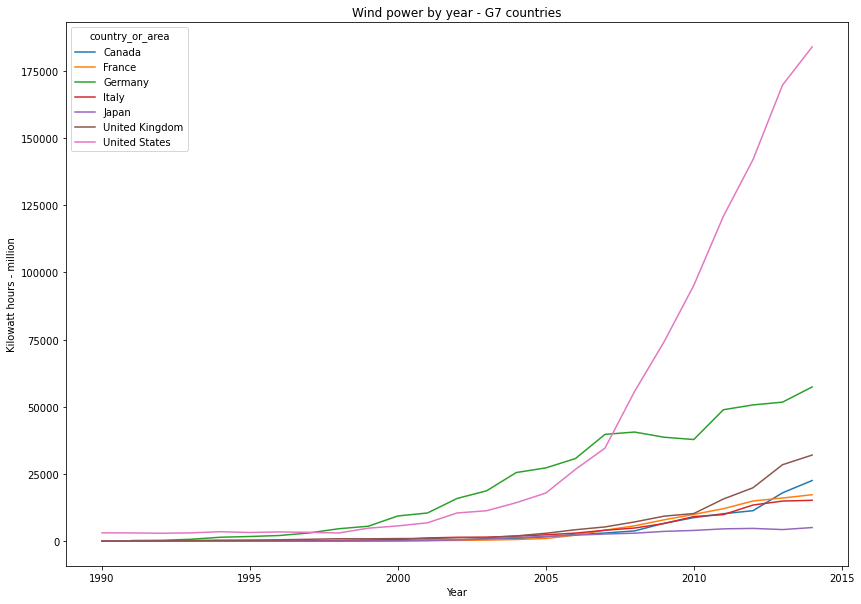

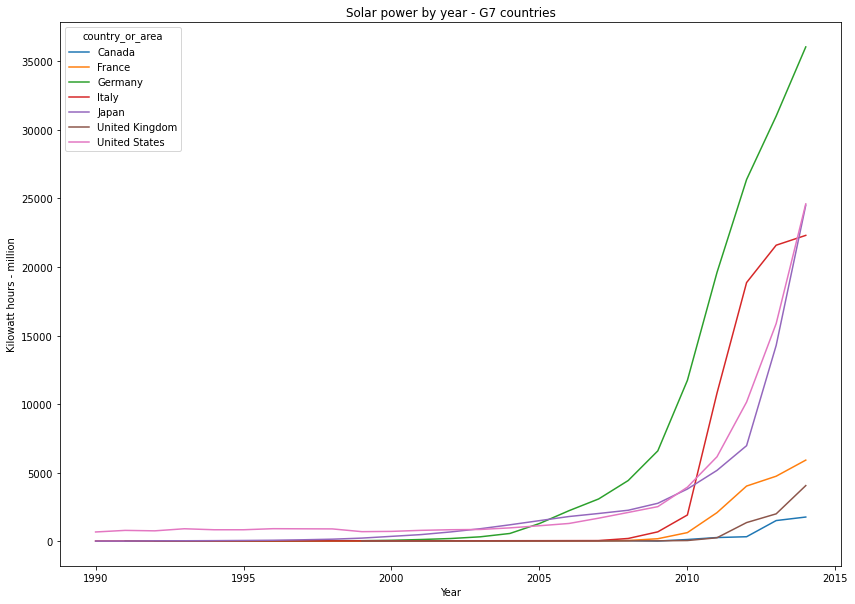

In [73]:
plt.figure(figsize=(14,10))
ax = sns.lineplot(x='year', y='quantity', data=wind_energy, ci=None, hue="country_or_area")
ax.set(xlabel='Year', ylabel='Kilowatt hours - million', title='Wind power by year - G7 countries')
plt.show()

plt.figure(figsize=(14,10))
ax = sns.lineplot(x='year', y='quantity', data=solar_energy, ci=None, hue="country_or_area")
ax.set(xlabel='Year', ylabel='Kilowatt hours - million', title='Solar power by year - G7 countries')
plt.show()

In [74]:
wind_energy_largest = energy_stats.loc[energy_stats['category'].isin(['wind_electricity'])]
solar_energy_largest = energy_stats.loc[energy_stats['category'].isin(['solar_electricity'])]
                                        
largest_wind = wind_energy_largest.nlargest(10, columns=['quantity'])
largest_wind.head(10)

,country_or_area,commodity_transaction,year,unit,quantity,category
1189436,United States,Electricity - total wind production,2014,"Kilowatt-hours, million",183892.0,wind_electricity
1189437,United States,Electricity - total wind production,2013,"Kilowatt-hours, million",169713.0,wind_electricity
1188317,China,Electricity - total wind production,2014,"Kilowatt-hours, million",156078.0,wind_electricity
1189438,United States,Electricity - total wind production,2012,"Kilowatt-hours, million",141922.0,wind_electricity
1188318,China,Electricity - total wind production,2013,"Kilowatt-hours, million",141197.0,wind_electricity
1189439,United States,Electricity - total wind production,2011,"Kilowatt-hours, million",120854.0,wind_electricity
1188319,China,Electricity - total wind production,2012,"Kilowatt-hours, million",95978.0,wind_electricity
1189440,United States,Electricity - total wind production,2010,"Kilowatt-hours, million",95148.0,wind_electricity
1189441,United States,Electricity - total wind production,2009,"Kilowatt-hours, million",74226.0,wind_electricity
1188320,China,Electricity - total wind production,2011,"Kilowatt-hours, million",70331.0,wind_electricity


In [75]:
largest_solar = solar_energy_largest.nlargest(10, columns=['quantity'])
largest_solar.head(10)

,country_or_area,commodity_transaction,year,unit,quantity,category
1026029,Germany,Electricity - total solar production,2014,"Kilowatt-hours, million",36056.0,solar_electricity
1026030,Germany,Electricity - total solar production,2013,"Kilowatt-hours, million",31010.0,solar_electricity
1026031,Germany,Electricity - total solar production,2012,"Kilowatt-hours, million",26380.0,solar_electricity
1026667,United States,Electricity - total solar production,2014,"Kilowatt-hours, million",24603.0,solar_electricity
1026133,Japan,Electricity - total solar production,2014,"Kilowatt-hours, million",24506.0,solar_electricity
1026108,Italy,Electricity - total solar production,2014,"Kilowatt-hours, million",22306.0,solar_electricity
1026109,Italy,Electricity - total solar production,2013,"Kilowatt-hours, million",21589.0,solar_electricity
1026032,Germany,Electricity - total solar production,2011,"Kilowatt-hours, million",19599.0,solar_electricity
1026110,Italy,Electricity - total solar production,2012,"Kilowatt-hours, million",18862.0,solar_electricity
1026668,United States,Electricity - total solar production,2013,"Kilowatt-hours, million",15872.0,solar_electricity


[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Watts per capita'),
 Text(0.5, 1.0, 'Solar power - top 10 countries in 2019')]

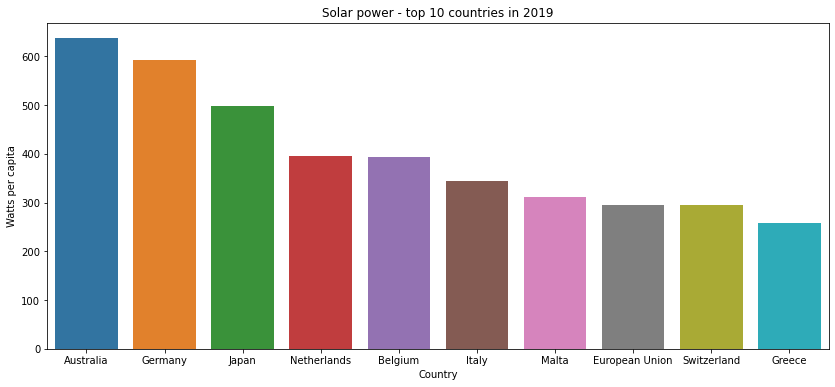

In [76]:
# Per capita, largest producers of solar - date from 2019
# https://en.wikipedia.org/wiki/Solar_power_by_country

solar = {'country':  ['Australia', 'Germany', 'Japan', 'Netherlands', 'Belgium', 'Italy', 'Malta', 'European Union',
                     'Switzerland', 'Greece'],
        'watt_per_capita': [637, 593, 498, 396, 394, 345, 312, 295, 295, 258]
        }

solar_per_cap = pd.DataFrame(solar)

fig = plt.figure(figsize=(14, 6))
ax = sns.barplot(x='country', y='watt_per_capita', data=solar_per_cap)
ax.set(xlabel='Country', ylabel='Watts per capita', title='Solar power - top 10 countries in 2019')

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Watts per capita'),
 Text(0.5, 1.0, 'Wind power - top 10 countries in 2020')]

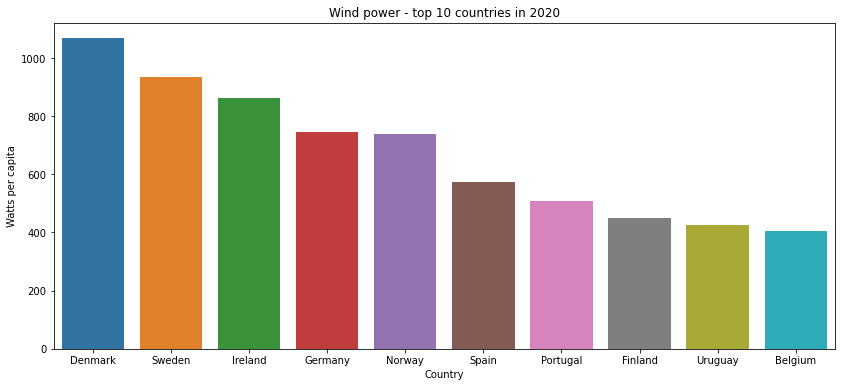

In [77]:
# Per capita, largest producers of wind - date from 2020
# https://en.wikipedia.org/wiki/Wind_power_by_country

wind = {'country': 
         ['Denmark', 'Sweden', 'Ireland', 'Germany', 'Norway', 'Spain', 'Portugal', 'Finland', 'Uruguay', 'Belgium'],
        'watt_per_capita': [1068, 933, 864, 747, 738, 572, 509, 449, 426, 406]
        }

wind_per_cap = pd.DataFrame(wind)

fig = plt.figure(figsize=(14, 6))
ax = sns.barplot(x='country', y='watt_per_capita', data=wind_per_cap)
ax.set(xlabel='Country', ylabel='Watts per capita', title='Wind power - top 10 countries in 2020')